In [1]:
import gym
from pogema_ppo_lstm import *

from pogema.wrappers.multi_time_limit import MultiTimeLimit
from pogema.animation import AnimationMonitor
from IPython.display import SVG, display


In [2]:
grid_config = GridConfig(num_agents=1, # количество агентов на карте
                             size=15,      # размеры карты
                             density=0.3,  # плотность препятствий
                             seed=1,       # сид генерации задания 
                             max_episode_steps=256,  # максимальная длина эпизода
                             obs_radius=5, # радиус обзора
                            )

env = gym.make("Pogema-v0", grid_config=grid_config)
env = AnimationMonitor(env)

# обновляем окружение
obs = env.reset()
model = PPO(obs[0].shape[0] * obs[0].shape[1] * obs[0].shape[2], env.action_space.n)
score = 0.0
print_interval = 20
iterations = 200
min_play_reward = 50

In [3]:
def play_game():
    done = False
    states_current = env.reset()    
    while(not done): 
        s_current = states_current[0].flatten()       
        prob = model.pi(torch.from_numpy(s_current).float())
        m = Categorical(prob)
        a = m.sample().item()
        actions = [a]
        states_next, rewards, dones, info = env.step(actions)
        #env.render()            
        states_current = states_next

# of episode :20, avg score : 0.0
# of episode :40, avg score : 0.0
# of episode :60, avg score : 0.0
# of episode :80, avg score : 0.0
# of episode :100, avg score : 0.0
# of episode :120, avg score : 0.0
# of episode :140, avg score : 0.0
# of episode :160, avg score : 0.0
# of episode :180, avg score : 0.0


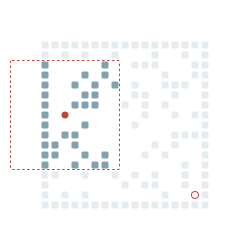

In [5]:
for iteration in range(iterations):
    states_current = env.reset()
    h_outs = [(torch.zeros([1, 1, 32], dtype=torch.float), torch.zeros([1, 1, 32], dtype=torch.float))] * 3
    dones = [False, ...]
    while not all(dones):
        for t in range(T_horizon): 
            h_ins = h_outs
            actions, h_outs = gen_actions(states_current, model, h_ins)
            states_next, rewards, dones, info = env.step(actions)
            store_data(states_current, actions, states_next, rewards, h_ins, h_outs, dones, model)
            states_current = states_next
            score += sum(rewards)
            if all(dones):
                if score/print_interval > min_play_reward:
                    play_game()
                break
        model.train_net()
    if iteration % print_interval == 0 and iteration != 0:
        print("# of episode :{}, avg score : {:.1f}".format(iteration, score/print_interval))
        score = 0.0

env.save_animation("render.svg", egocentric_idx=0)
display(SVG('render.svg'))
env.close()
